# 🤧 Breast Cancer Prediction

A machine learning model that detects whether a person has breast cancer with an accuracy of 95%.

## 📊 Data

The data is from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

## 🥧 How the model was made

The model was made using [Tensorflow](https://www.tensorflow.org/), an excellent machine learning and deep learning library. I used Keras as the model.

## 🏗️ How the notebook is structured

* Explore the data
* Create model

## 🔍 What you will find

* The use of [Scikit-Learn](https://www.scikit-learn.org/)
* Many awesome functions
* Accuracy of the model

## How to clone the project

Type in this command in your terminal

```bash
    git clone https://github.com/Siwan-SR/breast-cancer-prediction
    
```


In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

## Explore and Visualize data



Now that we have imported our tools, let's explore our data.

In [3]:
data = load_breast_cancer()
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print(data.target_names)

['malignant' 'benign']


In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.data.shape

(569, 30)

## Create model

We will create the model using KNeighborsClassifier. The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [7]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Training: 80% of data; Testing: 20% of data

In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.956140350877193

In [26]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")

In [27]:
y_pred = model.predict(X_test)

model_report(y_test, y_pred)

Accuracy: 95.61%
Precision: 0.9342105263157895
Recall: 1.0
F1 Score: 0.9659863945578232


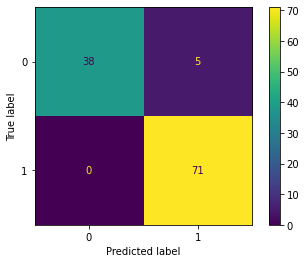

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [29]:
y_probs = model.predict_proba(X_test)

y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [30]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="lime", label="ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

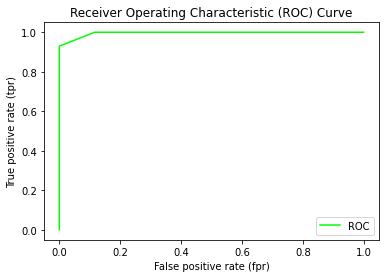

In [31]:
plot_roc_curve(fpr, tpr)